In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv('kyphosis.csv')

The data has 81 rows and 4 columns which represents records on patients who have had corrective spinal surgery. The dataset is in a comma separate value (csv) format. Due to the small sample size of the data, we used all the data representing 100% for the training.
The features of the data represent 3 inputs and 1 output, where:

    Age: in months
    Number: the number of vertebrae involved
    Start: the number of the first (topmost) vertebrae operated on.

Output
Kyphosis: a factor with levels absent or present indicating if a kyphosis (a type of deformation) was present after the operation or surgery.

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


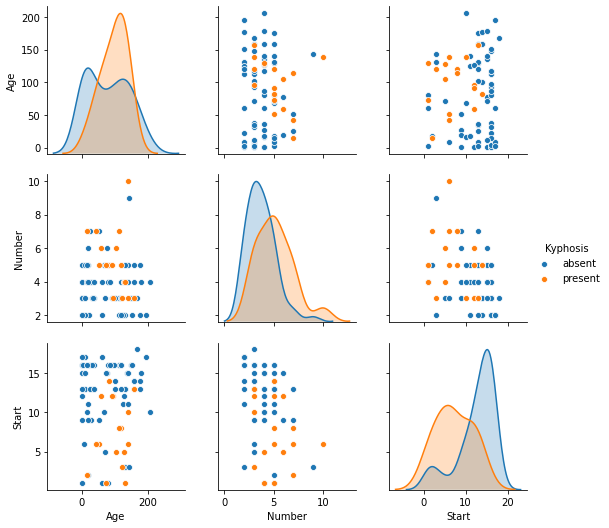

In [5]:
sns.pairplot(df,hue='Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc = RandomForestClassifier(n_estimators=100)

In [11]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
rfc_pred = rfc.predict(X_test)

In [13]:
rfc.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.57, 0.43],
       [0.8 , 0.2 ],
       [0.89, 0.11],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.7 , 0.3 ],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.67, 0.33],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.65, 0.35],
       [0.72, 0.28],
       [0.26, 0.74],
       [0.91, 0.09],
       [0.66, 0.34],
       [0.71, 0.29],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.86, 0.14],
       [0.69, 0.31]])

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


In [16]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [17]:
rfc.score(X_test,y_test)

0.8

In [18]:
# we dont have enoght data here, so the agg didnt help
# in the ex, we'll have a much larger dataset and we'll see the difference in the accuracy